In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier as knn

In [49]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')
dft = pd.read_csv('Diabetes_Xtest.csv')
x = dfx.values
y = dfy.values
t = dft.values
dfx.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [3]:
x

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

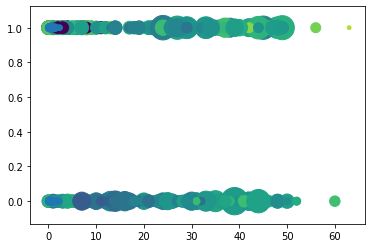

In [4]:
plt.scatter(x[:,0], y, x[:,1], x[:,2])
plt.scatter(x[:,3], y, x[:,4], x[:,5])
plt.scatter(x[:,6], y, x[:,7])

Text(0.5, 1.0, 'Diabetes as per pregnancy')

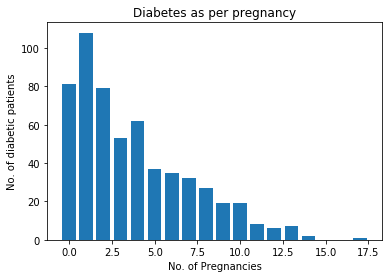

In [66]:
plt.bar(dfx['Pregnancies'].value_counts().index, dfx['Pregnancies'].value_counts().values)
plt.xlabel('No. of Pregnancies')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per pregnancy')

Text(0.5, 1.0, 'Diabetes as per glucose level')

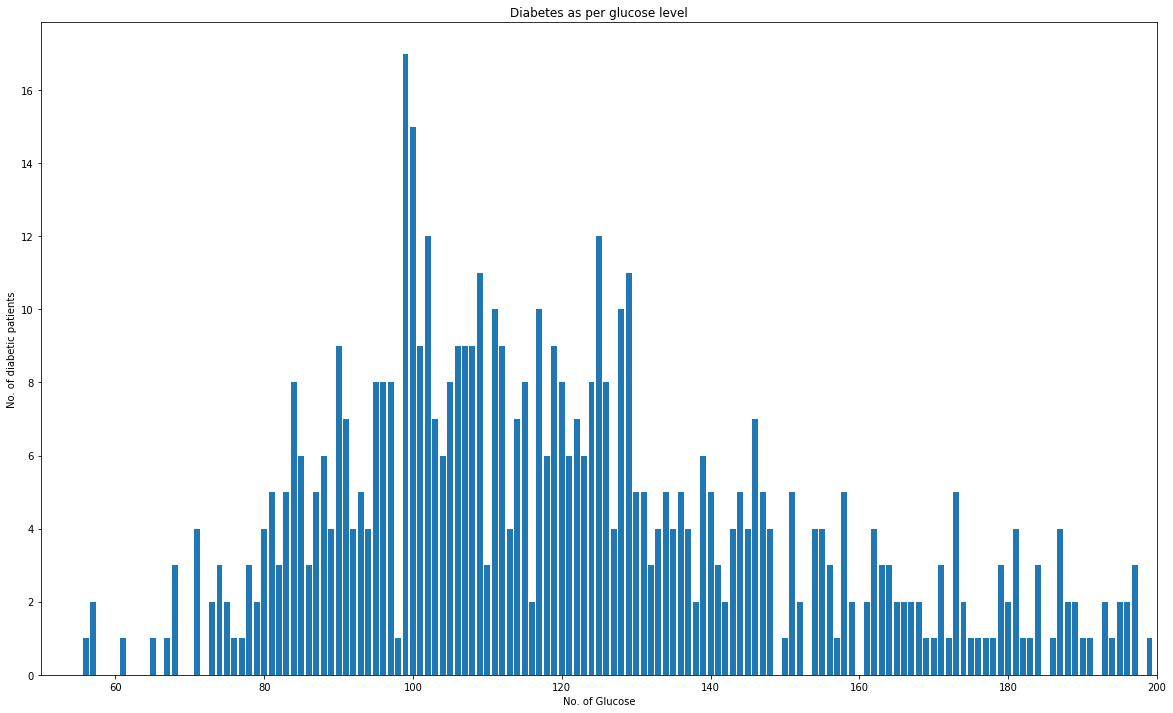

In [91]:
plt.figure(figsize = (20,12))
plt.bar(dfx['Glucose'].value_counts().index, dfx['Glucose'].value_counts().values)
plt.xlim(50,200)
plt.xlabel('No. of Glucose')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per glucose level')

Text(0.5, 1.0, 'Diabetes as per BloodPressure')

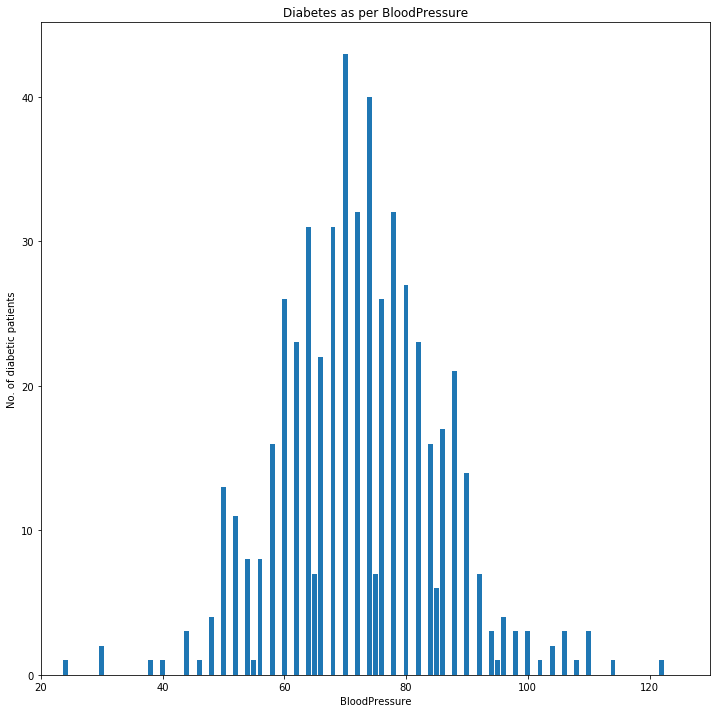

In [93]:
plt.figure(figsize = (12,12))
plt.bar(dfx['BloodPressure'].value_counts().index, dfx['BloodPressure'].value_counts().values)
plt.xlim(20,130)
plt.xlabel('BloodPressure')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per BloodPressure')

Text(0.5, 1.0, 'Diabetes as per SkinThickness')

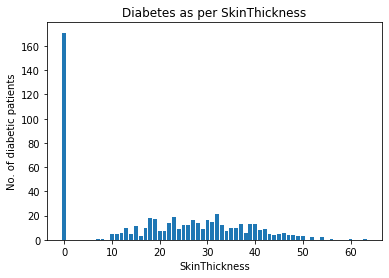

In [74]:
plt.bar(dfx['SkinThickness'].value_counts().index, dfx['SkinThickness'].value_counts().values)
plt.xlabel('SkinThickness')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per SkinThickness')

Text(0.5, 1.0, 'Diabetes as per Insulin value')

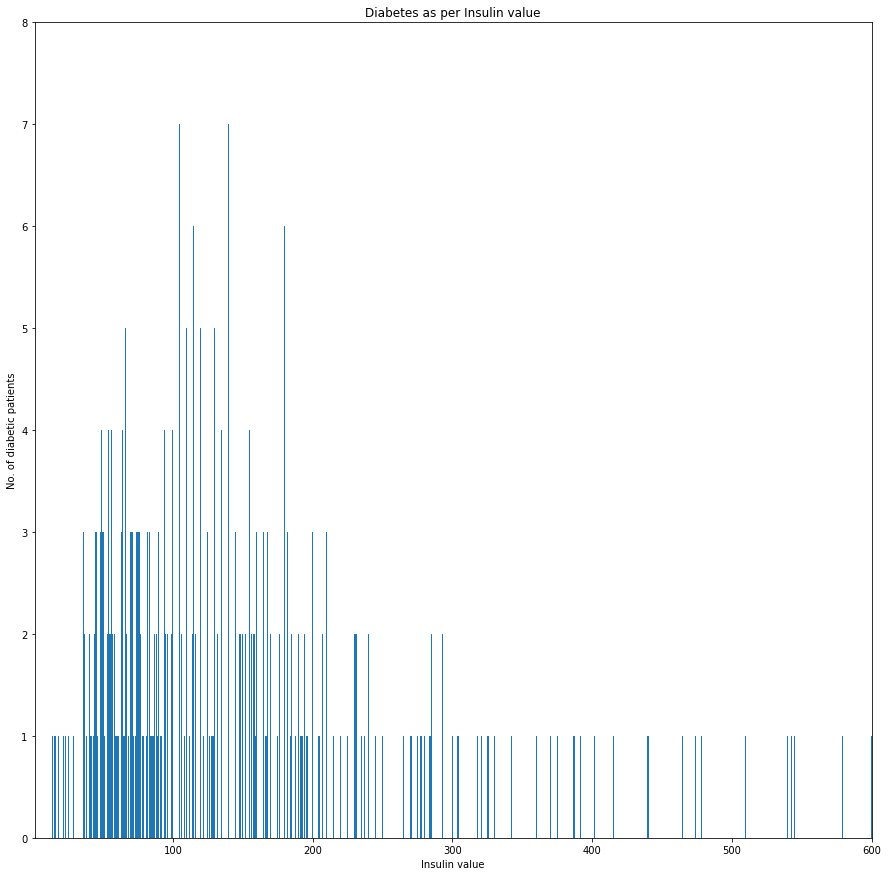

In [83]:
plt.figure(figsize = (15,15))
plt.bar(dfx['Insulin'].value_counts().index, dfx['Insulin'].value_counts().values)
plt.xlim(1,600)
plt.ylim(0,8)
plt.xlabel('Insulin value')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per Insulin value')

Text(0.5, 1.0, 'Diabetes as per BMI')

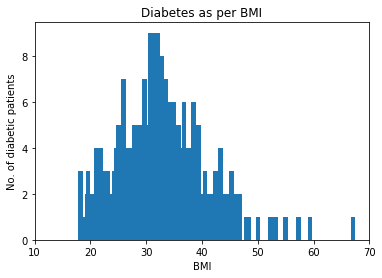

In [85]:
plt.bar(dfx['BMI'].value_counts().index, dfx['BMI'].value_counts().values)
plt.xlabel('BMI')
plt.xlim(10,70)
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per BMI')

Text(0.5, 1.0, 'Diabetes as per DPF')

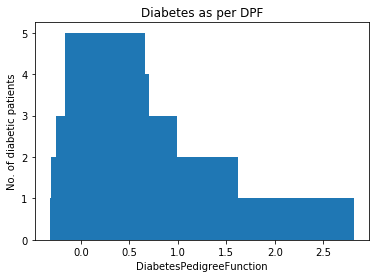

In [86]:
plt.bar(dfx['DiabetesPedigreeFunction'].value_counts().index, dfx['DiabetesPedigreeFunction'].value_counts().values)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per DPF')

Text(0.5, 1.0, 'Diabetes as per Age')

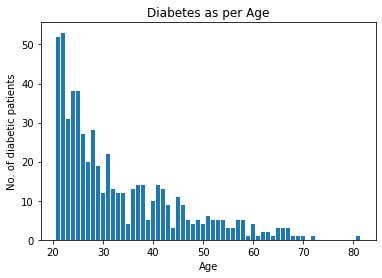

In [87]:
plt.bar(dfx['Age'].value_counts().index, dfx['Age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('No. of diabetic patients')
plt.title('Diabetes as per Age')

In [8]:
def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [9]:
# K-NN Algorithm
def knn(x, y, querypoint, k=5):
    
    # Pick K Nearest Neighbours
    
    vals = []
    
    # for every point in the x
    for i in range(x.shape[0]):
        
        # Compute distance
        d = distance(querypoint, x[i])
        vals.append((d, y[i]))
    
    # 2. Sort the array and find K Nearest point
    vals = sorted(vals)
    vals = vals[:k]
    
    # Majority vote
    
    vals = np.array(vals)
    
    new_values = np.unique(vals[:,1], return_counts=True)
    
    # Index of maximum count
    index = new_values[1].argmax()
    
    # Map this index with my data
    
    pred = new_values[0][index]
    
    return pred

In [10]:
for i in range(dft.shape[0]):
    n = knn(x,y,t[i])
    print(int(n))

1
0
0
0
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
1
1
0


In [88]:
df = pd.DataFrame(n)

In [90]:
df.to_csv('df.csv')